<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Fine_Tuning_final_proposed_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [7]:
df = pd.read_csv("/content/43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [8]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


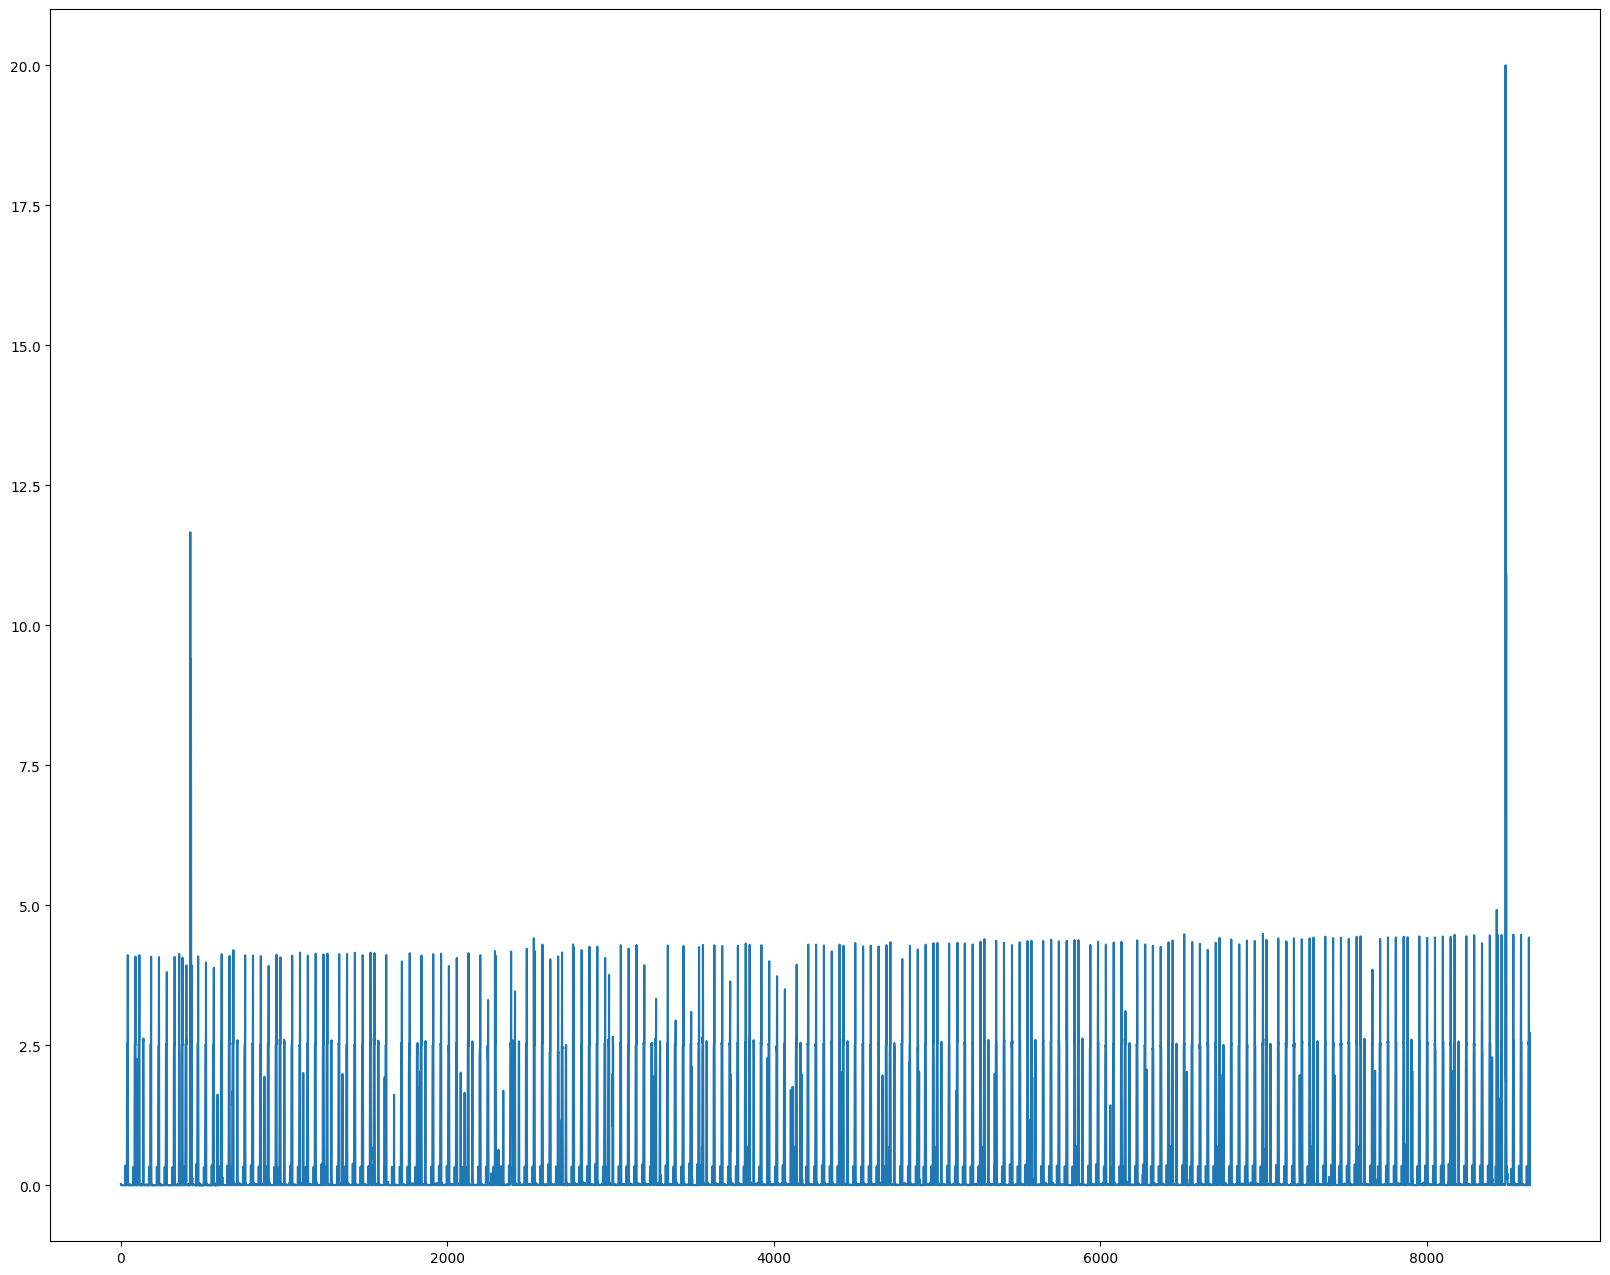

In [9]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [11]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape


 # Replace with your sequence size
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu")),  # Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape


 # Replace with your sequence size
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu",return_sequences=True)),  # Return sequences here
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.GRU(64, activation="relu", return_sequences=True),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(15, activation="relu"),
        tf.keras.layers.Dense(1,'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My best model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu")),  # Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [16]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00172, saving model to best_model.h5
94/94 - 11s - loss: 0.0023 - mae: 0.0323 - mse: 0.0023 - val_loss: 0.0017 - val_mae: 0.0218 - val_mse: 0.0017 - 11s/epoch - 121ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00172 to 0.00110, saving model to best_model.h5
94/94 - 2s - loss: 8.4614e-04 - mae: 0.0140 - mse: 8.4614e-04 - val_loss: 0.0011 - val_mae: 0.0120 - val_mse: 0.0011 - 2s/epoch - 26ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00110 to 0.00101, saving model to best_model.h5
94/94 - 1s - loss: 7.2631e-04 - mae: 0.0121 - mse: 7.2631e-04 - val_loss: 0.0010 - val_mae: 0.0124 - val_mse: 0.0010 - 1s/epoch - 14ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00101 to 0.00098, saving model to best_model.h5
94/94 - 1s - loss: 6.6485e-04 - mae: 0.0115 - mse: 6.6485e-04 - val_loss: 9.8074e-04 - val_mae: 0.0116 - val_mse: 9.8074e-04 - 938ms/epoch - 10ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00098 to 0.00092, saving model to best_model.h5
94/94 - 1s - loss: 6.3143e-04 - mae: 0.0112 - mse: 6.3143e-04 - val_loss: 9.2136e-04 - val_mae: 0.0134 - val_mse: 9.2136e-04 - 968ms/epoch - 10ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00092 to

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00119 to 0.00105, saving model to best_model.h5
94/94 - 1s - loss: 7.0593e-04 - mae: 0.0121 - mse: 7.0593e-04 - val_loss: 0.0011 - val_mae: 0.0115 - val_mse: 0.0011 - 957ms/epoch - 10ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00105 to 0.00102, saving model to best_model.h5
94/94 - 1s - loss: 5.6088e-04 - mae: 0.0104 - mse: 5.6088e-04 - val_loss: 0.0010 - val_mae: 0.0107 - val_mse: 0.0010 - 995ms/epoch - 11ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00102
94/94 - 1s - loss: 5.2909e-04 - mae: 0.0100 - mse: 5.2909e-04 - val_loss: 0.0011 - val_mae: 0.0102 - val_mse: 0.0011 - 939ms/epoch - 10ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00102 to 0.00095, saving model to best_model.h5
94/94 - 1s - loss: 5.0475e-04 - mae: 0.0094 - mse: 5.0475e-04 - val_loss: 9.4824e-04 - val_mae: 0.0094 - val_mse: 9.4824e-04 - 994ms/epoch - 11ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00095 to 0.00091, saving model to best_model.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00122 to 0.00104, saving model to best_model.h5
93/93 - 1s - loss: 6.9420e-04 - mae: 0.0117 - mse: 6.9420e-04 - val_loss: 0.0010 - val_mae: 0.0109 - val_mse: 0.0010 - 984ms/epoch - 11ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00104 to 0.00097, saving model to best_model.h5
93/93 - 1s - loss: 5.5735e-04 - mae: 0.0101 - mse: 5.5735e-04 - val_loss: 9.7117e-04 - val_mae: 0.0120 - val_mse: 9.7117e-04 - 960ms/epoch - 10ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00097 to 0.00095, saving model to best_model.h5
93/93 - 1s - loss: 5.0907e-04 - mae: 0.0098 - mse: 5.0907e-04 - val_loss: 9.4582e-04 - val_mae: 0.0108 - val_mse: 9.4582e-04 - 968ms/epoch - 10ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00095
93/93 - 1s - loss: 4.5389e-04 - mae: 0.0088 - mse: 4.5389e-04 - val_loss: 9.5661e-04 - val_mae: 0.0094 - val_mse: 9.5661e-04 - 1s/epoch - 12ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00095 to 0.00085, saving model t

simple GRU

simple bilstm